## How to create your own Neutron-Density, Neutron-Sonic and Sonic-Density crossplots

All crossplots contain overlaying lines for three main important lithologies: sandstone, limestone and dolomite.

In most of the cases, Neutronic Log is expressed in limestone porosity units. Each neutronic tool has its own lithology correction chart. <br>

So the challange when you build your crossplot is to find the <u>appropiate overlaying lines for a specific tool</u>.

<b>NOTE:</b> Environmental corrections (borehole size, mudacake thickness, borehole salinity and temperature, mud weight, pressure, limestone formation salinity) are not subject of this notebook! 

In [1]:
#Make general imports
import matplotlib.pyplot as plt
import numpy as np

### First Method - by using Aproximative equations

Usually service companies dont publish aproximative equations for their neutronic porosity conversions, just charts.
However I have found two sources:

 - Well Logging and Interpretation Techniques, Dresser Atlas , Ch. XI - Neutron logs, page 23
 - Crain Ross webpage (https://www.spec2000.net/12-phint.htm). 
 
In this example, SCH - CNL & SNP tool equations from Crane's page will be used.

First we will create an array called <i><b>lsX</i></b> to store limestone porosities (the other poros will be function of lsX) between 0 and 0.45. 

In [2]:
lsX = np.linspace(0,0.45,46)

Then porosity of sandstone, dolomite for SNP tool will be calculated with following eq.:

In [3]:
ssSNP = 0.222*lsX**2 + 1.021*lsX + 0.024
dolSNP = 0.6*lsX**2 + 0.749*lsX - 0.00434

CNL tool porosities are calculated below:

In [4]:
ssCNL = 0.222*lsX**2 + 1.021*lsX + 0.039
dolCNL = 1.40*lsX**2 + 0.389*lsX - 0.01259

In order to plot Sandstone and Dolomite porosity overlines on crossplots, we'll need to calculate x-axis values:

        ssCnl = 0.222 x lsX^2 + 1.021 x lsX + 0.039

         => 0.222 x lsX^2 + 1.021 x lsX + 0.039 - ssCnl = 0

        => ssCnlX = positive lsX solutionof equation

We repeat the same calculation for sandstone, dolomite (SNP & CNL)

In [5]:
ssSnpX = np.empty((np.size(lsX),0), float)
dolSnpX = np.empty((np.size(lsX),0), float)
ssCnlX = np.empty((np.size(lsX),0), float)
dolCnlX = np.empty((np.size(lsX),0), float)

for i in np.nditer(lsX):
    ssSnpX = np.append(ssSnpX, np.roots([0.222, 1.021, 0.024 - i])[1])
    dolSnpX = np.append(dolSnpX, np.roots([0.6, 0.749, -0.00434 - i])[1])
    ssCnlX = np.append(ssCnlX, np.roots([0.222, 1.021, 0.039 - i])[1])
    dolCnlX = np.append(dolCnlX, np.roots([1.40, 0.389, -0.01259 - i])[1])

Next calulate the density by inverting the "porosity from density" formula,

        Porosity = (DEN - DEN_matrix) / (DEN_fluid - DEN_matrix)

it results:

        DEN = (DEN_fluid - DEN_matrix) x Porosity + DEN_matrix

and considering:

- matrix densities [g/cc]: 2.71 - limestone, 2.65 - sandstone, 2.87 - dolomite

- fluid density [g/cc]: 1 - fresh water

In [6]:
denLs = (1 - 2.71) * lsX + 2.71
denSs = (1 - 2.65) * lsX + 2.65  
denDol = (1 - 2.87) * lsX + 2.87

We will exemplify <u>only with the Neutron Porosity equivalent curves & Neutron-Density CrossPlot</u> in this case.

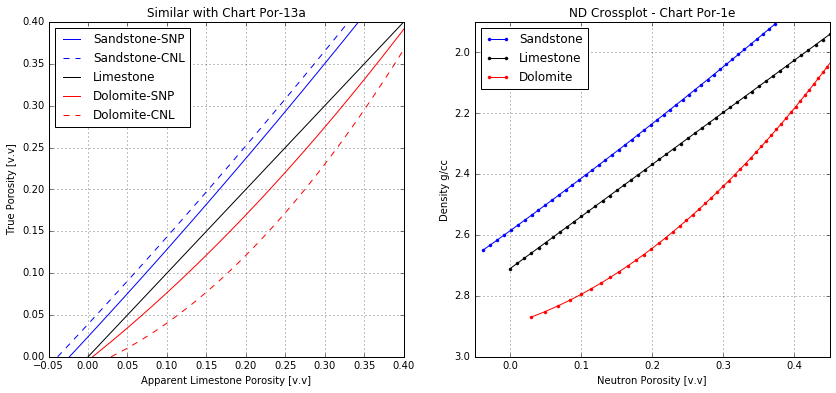

In [7]:
%matplotlib inline

fig, ax = plt.subplots(2, figsize=(14,6))

ax[0] = plt.subplot(121)
ax[1] = plt.subplot(122)

#Setting for first Chart (Neutron Porosity equivalent curves)
ax[0].set_title("Similar with Chart Por-13a")
ax[0].set_xlabel("Apparent Limestone Porosity [v.v]")
ax[0].set_ylabel("True Porosity [v.v]")
ax[0].set_xlim(-0.05,0.40)
ax[0].set_ylim(0,0.40)

ax[0].plot(ssSnpX, lsX, '-', color='blue', label = 'Sandstone-SNP')
ax[0].plot(ssCnlX, lsX, '--', color='blue', label = 'Sandstone-CNL')
ax[0].plot(lsX, lsX, '-', color='black', label = 'Limestone')
ax[0].plot(dolSnpX, lsX, '-', color='red', label = 'Dolomite-SNP')
ax[0].plot(dolCnlX, lsX, '--', color='red', label = 'Dolomite-CNL')
ax[0].legend(loc='best')
ax[0].grid(True)

#Settings for second chart (Neutron Density)
ax[1].set_title("ND Crossplot - Chart Por-1e")
ax[1].set_xlabel("Neutron Porosity [v.v]")
ax[1].set_ylabel("Density g/cc")
ax[1].set_xlim(-0.05,0.45)
ax[1].set_ylim(3,1.9)
ax[1].plot(ssCnlX, denSs, '.-', color='blue', label = 'Sandstone')
ax[1].plot(lsX, denLs, '.-', color='black', label = 'Limestone')
ax[1].plot(dolCnlX, denDol, '.-', color='red', label = 'Dolomite')
ax[1].legend(loc='best')
ax[1].grid(True)


### Second Method - Digitizing overlines from available Chartbooks

<br>
Data has been digitized from Chartbook and will be imported from txt file.

<img src="slb_cnl_capture.png" width="25%" height="25%">

In [8]:
data = np.genfromtxt("slb_cnl.txt",skip_header=1, names = True)

In [9]:
ls = data['ls']
ss = data['ss']
dol = data['dol']

NOTE: In case a fine resampling of the porosities values is needed, let's say (0.01 or 1%), then use a linear interpolation function like this:

In [10]:
ls_resampled_001 = np.interp(np.linspace(0, 0.45, 46), ls, ls)
ss_resampled_001 = np.interp(np.linspace(0, 0.45, 46), ls, ss)
dol_resampled_001 = np.interp(np.linspace(0, 0.45, 46), ls, ss)

- Density is estimated from porosity as above:

In [11]:
denLs = 2.71 - (2.71 -1) * ls
denSs = 2.65 - (2.65 -1) * ss
denDol = 2.87 - (2.87 -1) * dol

- Sonic travel times DT for Xplots are calculated reversing Willie and Raymer-Hunt equations.

        Porosity_Willie = (DT_log-DT_matrix) / (DT_fluid-DT_matrix)

        Porosity_Raymer-Hunt = (1 / c) x (DT_log-DT_matrix) / DT_log
        
- Reversing the eqs:

        DT_Willie = (DT_fluid-DT_matrix) x Porosity + DT_matrix

        DT_Raymer-Hunt = c x DT_matrix / (c - Porosity)

- SS, LS and DOL matrix [us/ft] values are listed below:
        - sandstone: 55.6, limestone: 47.6; dolomite: 43.5
        - fluid: 190 (fresh water)

In [12]:
c =0.67 #common value for Raymer-Hunt equation c=5/8

sonicWss = (190 - 55.6) * ls + 55.6     
sonicWls = (190 -47.6) * ls + 47.6
sonicWdol =(190 - 43.5) * ls + 43.5 

sonicRHss = c * 55.6 /(c - ls)
sonicRHls = c * 47.6 /(c - ls)
sonicRHdol = c * 43.5 /(c - ls)

- Create the Neutron Porosity Equivalence, Neutron-Density, Neutron-Sonic, Density-Sonic Crossplots

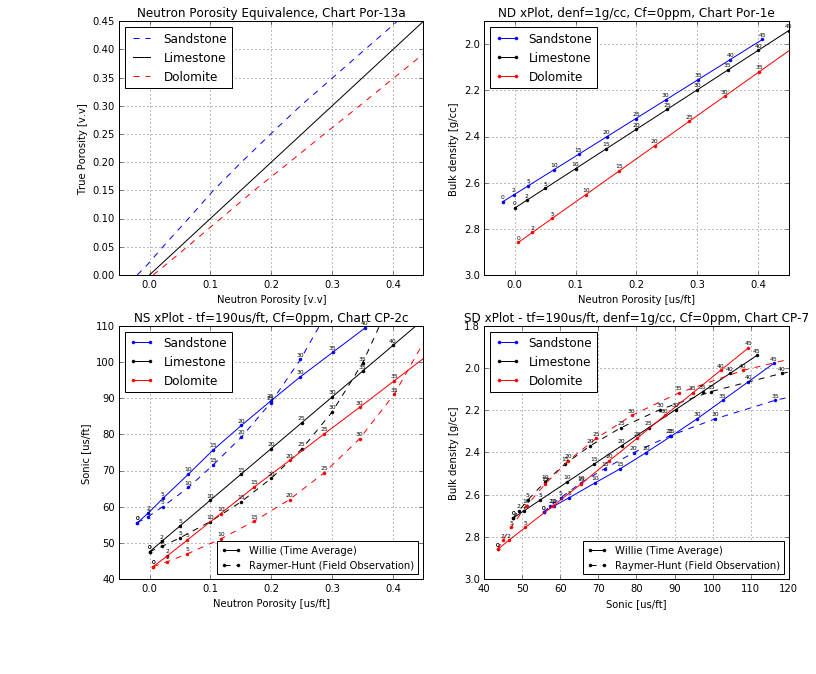

In [13]:
fig, ax = plt.subplots(4, figsize=(12, 10))

ax[0] = plt.subplot(221)
ax[1] = plt.subplot(222)
ax[2] = plt.subplot(223)
ax[3] = plt.subplot(224)

#Settings for Chart1 (Neutron Porosity Equivalence)
ax[0].set_title("Neutron Porosity Equivalence, Chart Por-13a")
ax[0].plot(ss, ls, '--', color='blue', label = 'Sandstone')
ax[0].plot(ls, ls, '-', color='black', label = 'Limestone')
ax[0].plot(dol, ls, '--', color='red', label = 'Dolomite')
ax[0].set_xlabel("Neutron Porosity [v.v]")
ax[0].set_ylabel("True Porosity [v.v]")
ax[0].set_xlim(-0.05,0.45)
ax[0].set_ylim(0,0.45)
ax[0].grid(True)
ax[0].legend(loc='best')

#Settings for Chart2 (ND xPlot)
ax[1].set_title("ND xPlot, denf=1g/cc, Cf=0ppm, Chart Por-1e")
ax[1].plot(ss, denSs, '.-', color='blue', label = 'Sandstone')
ax[1].plot(ls, denLs, '.-', color='black', label = 'Limestone')
ax[1].plot(dol, denDol, '.-', color='red', label = 'Dolomite')
ax[1].set_xlabel("Neutron Porosity [us/ft]")
ax[1].set_ylabel("Bulk density [g/cc]")
ax[1].set_xlim(-0.05,0.45)
ax[1].set_ylim(3,1.9)
ax[1].grid(True)
ax[1].legend(loc='best')

#Settings for Chart3 (NS xPlot)
ax[2].set_title("NS xPlot - tf=190us/ft, Cf=0ppm, Chart CP-2c")
ax[2].plot(ss, sonicWss,  '.-', color='blue',label = 'Sandstone')
ax[2].plot(ss, sonicRHss,  '.--', color='blue')
ax[2].plot(ls, sonicWls, '.-', color='black', label = 'Limestone' )
ax[2].plot(ls, sonicRHls, '.--', color='black')
ax[2].plot(dol, sonicWdol, '.-', color='red', label = 'Dolomite')
ax[2].plot(dol, sonicRHdol, '.--', color='red')
ax[2].set_xlabel("Neutron Porosity [us/ft]")
ax[2].set_ylabel("Sonic [us/ft]")
ax[2].set_xlim(-0.05,0.45)
ax[2].set_ylim(40,110)
ax[2].grid(True)

        
#Settings for Chart4(SD xPlot)
ax[3].set_title("SD xPlot - tf=190us/ft, denf=1g/cc, Cf=0ppm, Chart CP-7")
ax[3].plot(sonicWss, denSs, '.-', color='blue',)
ax[3].plot(sonicRHss, denSs, '.--', color='blue')
ax[3].plot(sonicWls, denLs, '.-', color='black', label = 'Willie (Time Average)')
ax[3].plot(sonicRHls, denLs,  '.--', color='black', label='Raymer-Hunt (Field Observation)')
ax[3].plot(sonicWdol, denDol, '.-', color='red')
ax[3].plot(sonicRHdol, denDol, '.--', color='red')
ax[3].set_xlabel("Sonic [us/ft]")
ax[3].set_ylabel("Bulk density [g/cc]")
ax[3].set_xlim(40,120)
ax[3].set_ylim(3,1.8)
ax[3].grid(True)

#Settings for chart 3 and 4 second legends
h1, l1 = ax[2].get_legend_handles_labels() #litologia
h2, l2 = ax[3].get_legend_handles_labels() #formula
ax[2].add_artist(ax[2].legend(h1,l1,loc=2))
ax[2].legend(h2,l2,loc=4,fontsize=10)
ax[3].add_artist(ax[3].legend(h1,l1,loc=2))
ax[3].legend(h2,l2,loc=4,fontsize=10)

#plot the porosity labels on each overline of chart 2,3,4
for i in range (0, np.size(ls)):
    x = np.array([ss[i],ls[i],dol[i]])
    y = np.array([denSs[i],denLs[i],denDol[i]])
    z = np.array([sonicWss[i],sonicWls[i],sonicWdol[i]])
    t = np.array([sonicRHss[i],sonicRHls[i],sonicRHdol[i]])
    #ax[1].plot(x,y,'-',color="gray")
    for j in range(0,x.size):
        ax[1].annotate(str(int(ls[i]*100)),xy=(x[j],y[j]),xytext=(0, 5), ha='center', va='center',
                textcoords='offset points', fontsize = 6, color="black")
        ax[2].annotate(str(int(ls[i]*100)),xy=(x[j],z[j]),xytext=(0, 5), ha='center', va='center',
                textcoords='offset points', fontsize = 6, color="black")
        ax[2].annotate(str(int(ls[i]*100)),xy=(x[j],t[j]),xytext=(0, 5), ha='center', va='center',
                textcoords='offset points', fontsize = 6, color="black")
        ax[3].annotate(str(int(ls[i]*100)),xy=(z[j],y[j]),xytext=(0, 5), ha='center', va='center',
                textcoords='offset points', fontsize = 6, color="black")
        ax[3].annotate(str(int(ls[i]*100)),xy=(t[j],y[j]),xytext=(0, 5), ha='center', va='center',
                textcoords='offset points', fontsize = 6, color="black")

### Very short conclusions

    - Equations for overlines are difficult to be found or not published by neutron tool manufacturers;

    - Fastest way to create your crossplot is to digitize sandstone, limestone and dolomite lines form chartbooks;
    
    - crossplots can be improved for visualisation by adding other chart elements like: some minerals points, gas corrections lines, etc.
